# Prediction using supervised ML
In the following project we have used Python's Sci Kit Learn package to implement the Linear Regression model of two variables to predict the scores of a student based on the number of hours studied.  

## 1. Understanding the Dataset
In the first step we import the basic libraries used to work with the dataset and derive some basic insights regarding the same. This allows us to gain a better understanding of the dataset at hand.

In [101]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [102]:
#reading the data from a url
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
task_data = pd.read_csv(url)

In [103]:
#printing the first 5 rows of the dataset
task_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [104]:
#printing the rows and columns of the data
task_data.shape

(25, 2)

In [105]:
#deriving the basic information of the dataset
task_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## 2. Pre-processing the Data
In this step we divide the data into inputs and outputs and plot a basic graph to understand the correlation between the two variables.

In [106]:
#Dividing the dataset into two variables, independent & dependent 
X = task_data.iloc[:,:-1].values
Y = task_data.iloc[:,1].values

In [107]:
#printing the independent variable values
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [108]:
#printing the dependent variable values
print(Y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


[Text(0.5, 1.0, 'Hours vs Scores')]

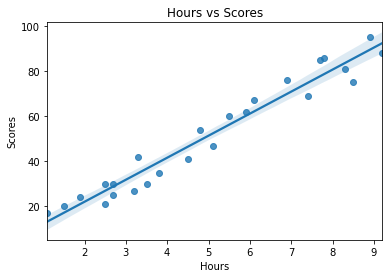

In [109]:
#creating a scatter plot with the best fit line for the given data points
sns.regplot(x="Hours",y="Scores",data = task_data).set(title = 'Hours vs Scores')

## 3. Implementing ML-Linear Regression model 
In this step, we will build a linear regression model to make the predictions we need. We'll also split the dataset into training and testing data using the existing train_test_split( ) function. The training data will be used to construct the model, while the testing data will be employed to assess the accuracy of the predictions in comparison to the actual values.

In [110]:
#importing required models/libraries from sci kit
from sklearn.model_selection import train_test_split

In [111]:
#splitting the data into training and testing data
SEED = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = SEED)

In [112]:
#printing the training data of hours studied
print(X_train)

[[2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]


In [113]:
#printing the training data of scores obtained
print(Y_train)

[25 42 47 35 20 27 41 95 75 30 30 24 54 67 86 60 85 17 69 88]


In [114]:
#importing the linear regression model from sci kit learn library
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [115]:
#training the data
regressor.fit(X_train, Y_train)

LinearRegression()

## 4. Predicting the Scores
During the fourth step, we utilize the developed model to predict the score for a given input value, specifically 9.25. Subsequently, we extend this prediction process to all the test values in our dataset and compare these predicted scores with the original values for evaluation purposes.

In [116]:
#predicting the scores for the given input
score = regressor.predict([[9.25]])
print(score)

[92.38611528]


In [117]:
#generating values using the test data as the input parameter
y_pred = regressor.predict(X_test)

In [118]:
#creating a dataframe to compare the actual and predicted scores
df_pred = pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})

In [119]:
#printing the dataframe with the actual and predicted scores
df_pred

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


## 5. Evaluating the model
In this last step we evaluate the accuracy of our model with the help of certain evaluation metrics by importing the existing functions from the Sci Kit Learn package.

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [121]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

In [122]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 3.92
Mean squared error: 18.94
Root mean squared error: 4.35


## 6. Conclusion
In order to conclude, we can say that all the errors are relatively low, taking into consideration the data that we have and the model succeeded in predicting fairly close to the original values that were taken.